# Desafío 26/06

__Integrantes:__ 
- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo

## Evaluar juicios de hipótesis
A continuación se presenta una serie de enunciados de hipótesis. Usted debe discernir si es posible
rechazar la hipótesis nula.

- 75 individuos elegidos al azar fueron alcanzados por activistas pro-LGTB que se identificaron como homosexuales, y 75 alcanzados por activistas pro-LGTB que se identificaron como heterosexuales. El objetivo era medir actitudes frente a la adopción homoparentales. La organización encargada de procesar los datos obtuvo los siguientes resultados:
    - El 67% de los encuestados por heterosexuales se mostró a favor de la adopción homoparental, mientras que un 72% de los encuestados por activistas que se identifaron como homosexuales se mostraron a favor de la adopción homoparental.
    - Asumiendo que la hipótesis nula es que ambos porcentajes no son diferentes, y la hipótesis alternativa es que existe una diferencia substancial entre ambos.
    - Con un valor de prueba p=11.83 y un puntaje de corte de 2.58, ¿qué se debe concluir?

__Respuesta:__ 

El objetivo central del primer enunciado es determinar la existencia de diferencias en la opinión de las personas sobre la adopción homoparental, en función si el encuestador es homosexual o heterosexual.

Estadísiticamente estamos en búsqueda de diferencias en proporciones de dos muestras:

La hipótesisis Nula a Evualar: Es la inexistencia de diferencias en los porcentajes. La Hipótesis Alternativa: Es la existencia de diferencia en los porcentajes.

Por otro lado, existen dos grupos

Grupo 1: Aquellas personas encuestadas por Heterosexuales, con un tamaño muestral de 75 y en donde el número de personas a favor de la adopción homoparental fue de 50, equivalente al 67% de la muestra. Grupo 2: Aquellas personas encuestadas por Homosexuales, con un tamaño muestral de 75 y en donde el número de personas a favor de la adopción homoparental fue de 54, equivalente al 72% de la muestra.

El enunciado del problema encontró los siguientes parámetros:

Un valor de prueba p= 11,83 y un puntaje de corte de 2,58

En Base a estos antecedentes podemos concluir con un 99% de significancia que es posible rechazar la hipótesis nula, toda vez que el valor de prueba (Z) se encuentra fuera de la zona de no rechazo, cuyo límite de corte es de 2.58. Es decir, existe evidencia estdísticamente significativa que permite afirmar que existen diferencias en las opiniones de las personas respecto a la adopción homoparental en función de la condición sexual declarada por el encuestador.

- Un investigador de la Sociedad de Abstemios de Chile sugiere que los hombres tienen
mayores niveles de consumo de alcohol que las mujeres, siendo esta diferencia
estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde
contrastó su puntaje de prueba a una distribución asintóticamente normal. ¿Qué se puede
decir sobre su estudio? 
__Respuesta:__ 

Con la información prevista en el segundo enunciado no es posible realizar una conclusión respecto al estudio, toda vez que el enunciado carese de información relevante para la formación de una opinión concluyente, a saber, alguno de los puntos obviados son:

El enunciado no informa respecto a la conformación de la muestra, la cual podría tener distintos problemas como por ejemplo sesgo de selección.

el estudio no hace referencia a la circunscripcción sobre la cual es válida la inferencia, es decir, no especifica de forma clara la población sobre la cual se busca inferir.

El tamaño muestral parece extremadamente bajo para obtener conclusiones sobre una población tan alta como el universo de hombres y mujeres.

El enunciado no transparente los parámetros obtenidos, ni la magnitud de las diferencias encontradas.

Toda esta es información esencial para la formación de una opinión respecto al estudio, por lo que no es posible concluir al respecto.

## Importe la base de datos utilizada la sesión presencial anterior

- Agrege una serie de variables binarias por cada continente de la variable region.
    - tip: Utilice np.where para ello.
- De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    - Apellidos desde la A hasta la N: Enfocarse en las variables chldmort, adfert y life.
    - Apellidos desde la N hasta la Z: Enfocarse en las variables femlab, literacy y school.

In [15]:
#importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from seaborn import distplot
from IPython.display import display, Markdown

df = pd.read_csv("nations.csv", encoding="ISO-8859-1",  index_col=0)

for region in df["region"].unique():
    df["binarize_" + region] = np.where(df['region'] == region, 1, 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 1 to 194
Data columns (total 18 columns):
country              194 non-null object
region               194 non-null object
gdp                  179 non-null float64
school               188 non-null float64
adfert               194 non-null float64
chldmort             193 non-null float64
life                 194 non-null float64
pop                  194 non-null int64
urban                194 non-null float64
femlab               177 non-null float64
literacy             135 non-null float64
co2                  185 non-null float64
gini                 81 non-null float64
binarize_Africa      194 non-null int64
binarize_Americas    194 non-null int64
binarize_Asia        194 non-null int64
binarize_Europe      194 non-null int64
binarize_Oceania     194 non-null int64
dtypes: float64(10), int64(6), object(2)
memory usage: 28.8+ KB


# 3. Implemente una función de prueba de hipótesis a mano

- La función debe ingresar los siguientes argumentos:
    - df: La tabla de datos.
    - variable : La variable a analizar.
    - binarize : El indicador binario a utilizar.

- tips:
    - Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con dropna().
    - Implemente ttest_ind de scipy.stats y guarde el valor t y pval.
    - Reporte las medias para cada grupo (0 y 1).
    - Reporte la diferencia de entre las medias.
    - Reporte los valores t y p

In [74]:
def prueba_hip(dataframe, variable, binarize):
       
    grupo_0 = dataframe[dataframe[binarize] == 0][variable].dropna()
    grupo_1 = dataframe[dataframe[binarize] == 1][variable].dropna()
    
    t, pvalue = stats.ttest_ind(grupo_0, grupo_1)
    
    stats.ttest_ind(grupo_0, grupo_1)
    
    mean_grupo_0 = grupo_0.mean()
    mean_grupo_1 = grupo_1.mean()

    display(Markdown(" - __Valor t:__ {} ".format(round(t,3))))
    display(Markdown(" - __Valor pvalue:__ {} ".format(round(pvalue,3))))
    display(Markdown(" - __La media de la region es:__ {}".format(round(mean_grupo_0,3))))
    display(Markdown(" - __La media del resto del mundo es:__ {}".format(round(mean_grupo_1,3))))
    display(Markdown(" - __La diferencia entre medias es:__ {}".format(round(mean_grupo_0 - mean_grupo_1,3))))
  
    
variables = ["chldmort", "adfert", "life"]

binarios_region = ["binarize_Africa",  
    "binarize_Asia", 
    "binarize_Europe", 
    "binarize_Oceania",
    "binarize_Americas"
]

region = ["Africa",  
    "Asia", 
    "Europe", 
    "Oceania",
    "Americas"
]

for var in variables:
    for region in df["region"].unique():
        display(Markdown("### Campo {} y region '{}'".format(var, region)))
        prueba_hip(df, var, "binarize_" + region)


### Campo chldmort y region 'Africa'

 - __Valor t:__ -14.174 

 - __Valor pvalue:__ 0.0 

 - __La media de la region es:__ 24.748

 - __La media del resto del mundo es:__ 109.75

 - __La diferencia entre medias es:__ -85.002

### Campo chldmort y region 'Americas'

 - __Valor t:__ 3.086 

 - __Valor pvalue:__ 0.002 

 - __La media de la region es:__ 53.052

 - __La media del resto del mundo es:__ 23.264

 - __La diferencia entre medias es:__ 29.788

### Campo chldmort y region 'Asia'

 - __Valor t:__ 1.603 

 - __Valor pvalue:__ 0.111 

 - __La media de la region es:__ 51.141

 - __La media del resto del mundo es:__ 37.104

 - __La diferencia entre medias es:__ 14.037

### Campo chldmort y region 'Europe'

 - __Valor t:__ 6.262 

 - __Valor pvalue:__ 0.0 

 - __La media de la region es:__ 59.29

 - __La media del resto del mundo es:__ 7.047

 - __La diferencia entre medias es:__ 52.243

### Campo chldmort y region 'Oceania'

 - __Valor t:__ 0.628 

 - __Valor pvalue:__ 0.531 

 - __La media de la region es:__ 48.344

 - __La media del resto del mundo es:__ 39.417

 - __La diferencia entre medias es:__ 8.927

### Campo adfert y region 'Africa'

 - __Valor t:__ -9.444 

 - __Valor pvalue:__ 0.0 

 - __La media de la region es:__ 36.835

 - __La media del resto del mundo es:__ 92.721

 - __La diferencia entre medias es:__ -55.887

### Campo adfert y region 'Americas'

 - __Valor t:__ -1.766 

 - __Valor pvalue:__ 0.079 

 - __La media de la region es:__ 49.207

 - __La media del resto del mundo es:__ 63.66

 - __La diferencia entre medias es:__ -14.453

### Campo adfert y region 'Asia'

 - __Valor t:__ 3.386 

 - __Valor pvalue:__ 0.001 

 - __La media de la region es:__ 57.88

 - __La media del resto del mundo es:__ 33.865

 - __La diferencia entre medias es:__ 24.015

### Campo adfert y region 'Europe'

 - __Valor t:__ 6.798 

 - __Valor pvalue:__ 0.0 

 - __La media de la region es:__ 62.145

 - __La media del resto del mundo es:__ 15.537

 - __La diferencia entre medias es:__ 46.608

### Campo adfert y region 'Oceania'

 - __Valor t:__ 0.623 

 - __Valor pvalue:__ 0.534 

 - __La media de la region es:__ 52.386

 - __La media del resto del mundo es:__ 44.993

 - __La diferencia entre medias es:__ 7.393

### Campo life y region 'Africa'

 - __Valor t:__ 15.175 

 - __Valor pvalue:__ 0.0 

 - __La media de la region es:__ 73.211

 - __La media del resto del mundo es:__ 56.49

 - __La diferencia entre medias es:__ 16.721

### Campo life y region 'Americas'

 - __Valor t:__ -3.138 

 - __Valor pvalue:__ 0.002 

 - __La media de la region es:__ 67.69

 - __La media del resto del mundo es:__ 73.451

 - __La diferencia entre medias es:__ -5.762

### Campo life y region 'Asia'

 - __Valor t:__ -1.735 

 - __Valor pvalue:__ 0.084 

 - __La media de la region es:__ 68.005

 - __La media del resto del mundo es:__ 70.872

 - __La diferencia entre medias es:__ -2.867

### Campo life y region 'Europe'

 - __Valor t:__ -6.735 

 - __Valor pvalue:__ 0.0 

 - __La media de la region es:__ 66.39

 - __La media del resto del mundo es:__ 76.946

 - __La diferencia entre medias es:__ -10.556

### Campo life y region 'Oceania'

 - __Valor t:__ -0.342 

 - __Valor pvalue:__ 0.733 

 - __La media de la region es:__ 68.658

 - __La media del resto del mundo es:__ 69.584

 - __La diferencia entre medias es:__ -0.927

# 4. Implemente una función que grafique los histogramas para ambas muestras.

- Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
    - tips: Refactorize la función incluyendo el método `hist` de `matplotlib.pyplot`. Incluya los argumentos alpha y label.
- Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada continente, y posteriormente grafique. 

Concluya con los principales resultados al respecto.

__Respuesta:__

- Para cada región se hicieron pruebas de hipótesis nula vs hipótesis alternativas, donde la hipótesis nula y alternativas se muestran más abajo (se rechaza la hipótesis nula si p < 0.05):
    - Campo __chldmort__: Probabilidad de muerte antes de los 5 años por cada 1000
        - $H_0$: La probabilidad de muerte antes de los 5 años por cada 1000 no se ve afectada por la región.
        - $H_1$: La probabilidad de muerte antes de los 5 años por cada 1000 se ve influída por la región de origen. 
            - __Africa__: Rechazamos la hipótesis nula.
            - __Asia__: No hay suficiente evidencia para rechazar la hipótesis nula.
            - __Europe__: Rechazamos la hipótesis nula.
            - __Oceanía__: No hay suficiente evidencia para rechazar la hipótesis nula.
            - __Americas__: Rechazamos la hipótesis nula.
    - Campo __adfert__: Fertilidad adolescente (nacimientos 1:1000 en mujeres entre 15 y 19)
        - $H_0$: La fertilidad adolescente (nacimientos 1:1000 en mujeres entre 15 y 19) no se ve afectada por la región.
        - $H_1$: La (nacimientos 1:1000 en mujeres entre 15 y 19) se ve influída por la región de origen. 
            - __Africa__: Rechazamos la hipótesis nula.
            - __Asia__: Rechazamos la hipótesis nula.
            - __Europe__: Rechazamos la hipótesis nula.
            - __Oceanía__: No hay suficiente evidencia para rechazar la hipótesis nula.
            - __Americas__: No hay suficiente evidencia para rechazar la hipótesis nula.
    - Campo __life__: Esperanza de vida al nacer.
        - $H_0$: La fertilidad adolescente (nacimientos 1:1000 en mujeres entre 15 y 19) no se ve afectada por la región.
        - $H_1$: La (nacimientos 1:1000 en mujeres entre 15 y 19) se ve influída por la región de origen.
            - __Africa__: Rechazamos la hipótesis nula.
            - __Asia__: No hay suficiente evidencia para rechazar la hipótesis nula.
            - __Europe__: Rechazamos la hipótesis nula.
            - __Oceanía__: No hay suficiente evidencia para rechazar la hipótesis nula.
            - __Americas__: Rechazamos la hipótesis nula.

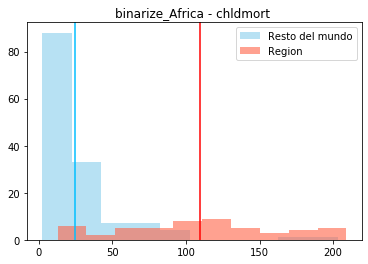

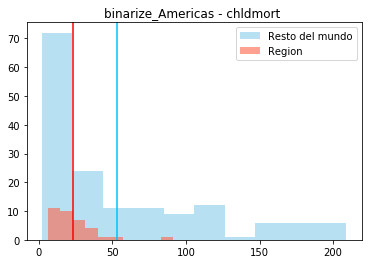

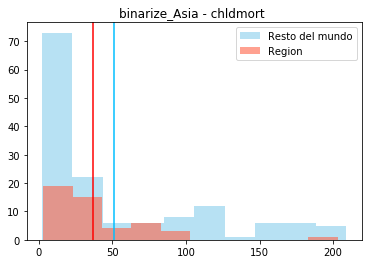

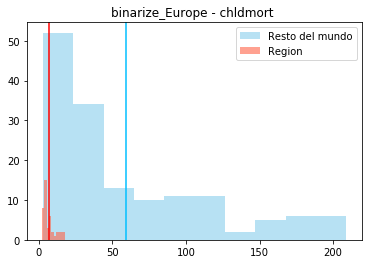

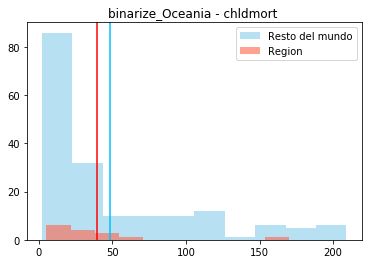

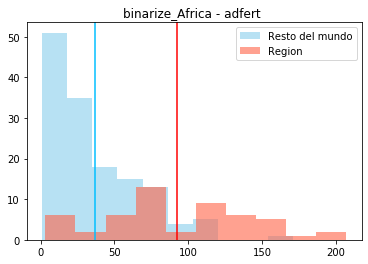

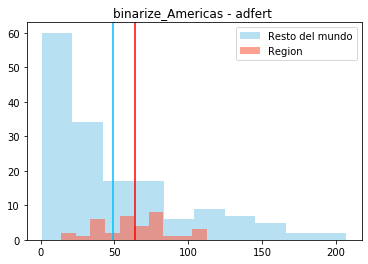

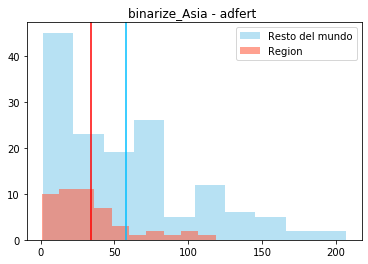

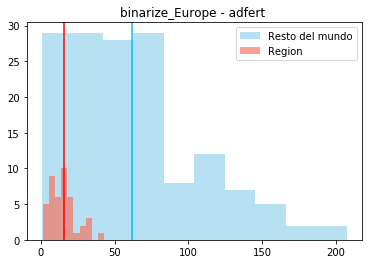

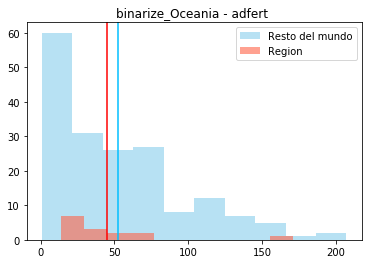

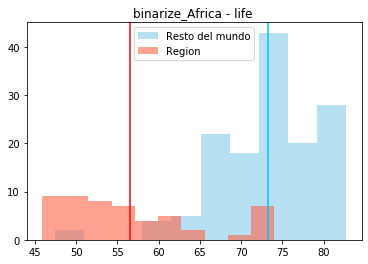

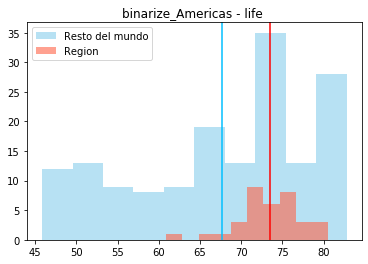

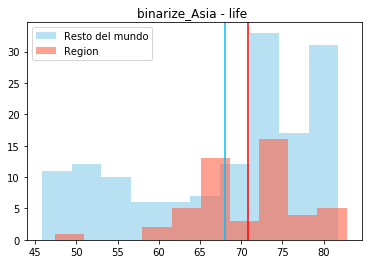

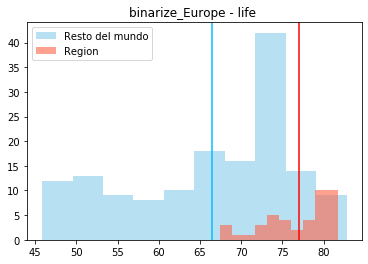

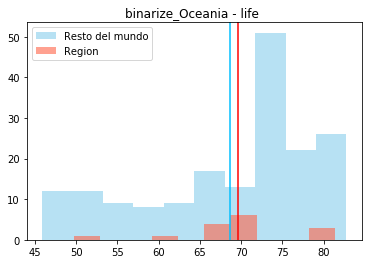

In [71]:
def prueba_hip2(dataframe, variable, binarize):
       
    grupo_0 = dataframe[dataframe[binarize] == 0][variable].dropna()
    grupo_1 = dataframe[dataframe[binarize] == 1][variable].dropna()
    
    t, pvalue = stats.ttest_ind(grupo_0, grupo_1)
    
    stats.ttest_ind(grupo_0, grupo_1)
    
    mean_grupo_0 = grupo_0.mean()
    mean_grupo_1 = grupo_1.mean()
    
    plt.figure()
    
    plt.hist(grupo_0, alpha=.6, color="skyblue", label="Resto del mundo")
    plt.axvline(mean_grupo_0, color="deepskyblue")

    plt.hist(grupo_1, alpha=.6, color="tomato", label="Region")
    plt.axvline(mean_grupo_1, color="red")
    
    plt.title("{} - {} ".format(binarize, variable))
    plt.legend()

for var in variables:
    for region in df["region"].unique():
        prueba_hip2(df, var, "binarize_" + region)